In [1]:
import sys; sys.path.append("..")
from imports import *
%matplotlib notebook
meta = MetadataCatalog.get('coco_2017_val')
dset = DatasetCatalog.get('coco_2017_val')
add_license(dset, meta)
dset[0].keys()

dict_keys(['file_name', 'height', 'width', 'image_id', 'annotations', 'license'])

In [2]:
{k: v for k, v in dset[0].items() if k != 'annotations'}

{'file_name': 'datasets/coco/val2017/000000000139.jpg',
 'height': 426,
 'width': 640,
 'image_id': 139,
 'license': 'Attribution-NonCommercial License'}

In [3]:
# all_dets = load(os.path.expanduser('~/reval_05/R50/evaluator_dump_R50_050/coco_instances_results.json.gz'))
all_dets = load(os.path.expanduser('~/reval_50/R50/evaluator_dump_R50_050/coco_instances_results.json.gz'))

In [4]:
dset[10]["license"]

'Attribution License'

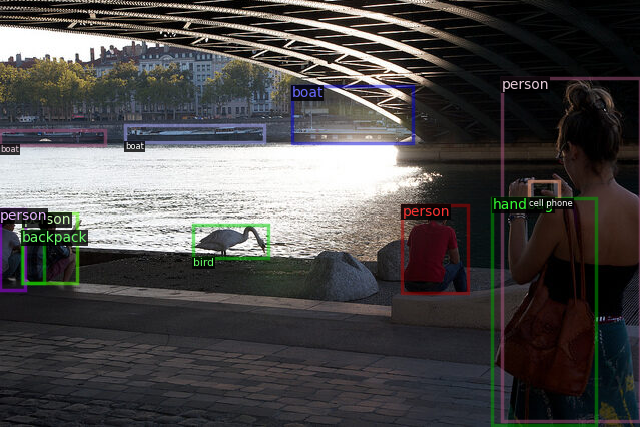

In [5]:
show_image_gt(dset[10], meta, mpl=False)

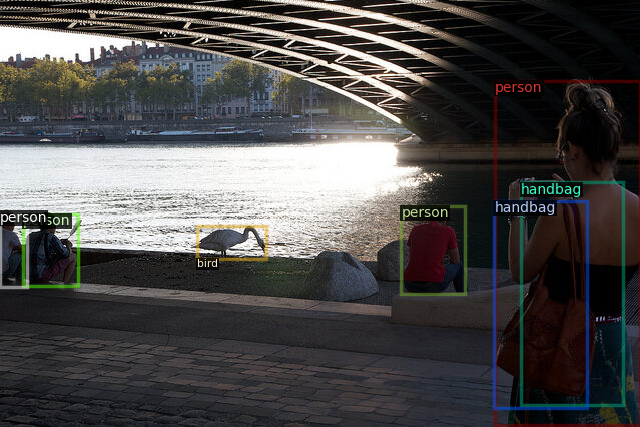

In [6]:
# 2021-05-25

import numpy as np
from detectron2.structures import BitMasks, Boxes, BoxMode
    
def show_image_detections(d: dict, all_dets, meta: Metadata, mpl=False):
    import cv2
    img = cv2.imread(d["file_name"])

    visualizer = Visualizer(img[:, :, ::-1], metadata=meta, scale=1.0)
    preds = [x for x in all_dets if x['image_id'] == d['image_id']]
    # preds = preds[:1]
    # print(preds)
    # vis = visualizer.draw_instance_predictions(preds)
    boxes = np.array([p['bbox'] for p in preds])
    # boxes = [x['bbox'] for x in d['annotations']]
    boxes = BoxMode.convert(boxes, BoxMode.XYWH_ABS, BoxMode.XYXY_ABS)
    names = Names(meta)
    labels = [names.get(a['category_id']) for a in preds]
    
    vis = visualizer.overlay_instances(boxes=boxes, labels=labels)
    v_img = vis.get_image()

    if mpl:
        plt.imshow(v_img)
    else:
        cv2_imshow(v_img[:, :, ::-1])

show_image_detections(dset[10], all_dets, meta, )

In [7]:
dset[10]['image_id']

1268

In [8]:
[(x['category_id'], x['bbox'], x['bbox_mode']) for x in dset[10]['annotations']]

[(14, [192.81, 224.8, 74.73, 33.43], <BoxMode.XYWH_ABS: 1>),
 (8, [124.77, 124.71, 139.54, 17.07], <BoxMode.XYWH_ABS: 1>),
 (8, [0.0, 129.71, 105.44, 15.14], <BoxMode.XYWH_ABS: 1>),
 (0, [23.27, 213.41, 53.53, 69.47], <BoxMode.XYWH_ABS: 1>),
 (0, [501.68, 77.66, 138.32, 343.71], <BoxMode.XYWH_ABS: 1>),
 (0, [402.34, 205.02, 65.26, 88.45], <BoxMode.XYWH_ABS: 1>),
 (0, [0.0, 209.18, 24.95, 80.6], <BoxMode.XYWH_ABS: 1>),
 (67, [528.91, 180.52, 29.68, 18.75], <BoxMode.XYWH_ABS: 1>),
 (24, [21.81, 231.3, 22.55, 51.55], <BoxMode.XYWH_ABS: 1>),
 (26, [492.47, 197.95, 103.07, 227.35], <BoxMode.XYWH_ABS: 1>),
 (8, [291.52, 86.03, 121.67, 57.45], <BoxMode.XYWH_ABS: 1>)]

In [9]:
meta.thing_classes[48]

'sandwich'

In [10]:
dset[0]['annotations'][0].keys()

dict_keys(['iscrowd', 'bbox', 'category_id', 'segmentation', 'bbox_mode'])

In [11]:
sorted([
    (
        len(d['annotations']), 
        d['file_name'], 
        Counter(meta.thing_classes[a['category_id']] for a in d['annotations'])
    )
    for d in dset
], reverse=True)[:3]

[(63,
  'datasets/coco/val2017/000000435081.jpg',
  Counter({'sandwich': 9,
           'fork': 4,
           'knife': 3,
           'spoon': 4,
           'carrot': 3,
           'donut': 5,
           'cake': 13,
           'bowl': 8,
           'pizza': 1,
           'chair': 1,
           'dining table': 9,
           'vase': 1,
           'cup': 2})),
 (56,
  'datasets/coco/val2017/000000470924.jpg',
  Counter({'car': 5,
           'chair': 13,
           'dining table': 3,
           'wine glass': 2,
           'cup': 5,
           'fork': 2,
           'knife': 4,
           'pizza': 8,
           'person': 14})),
 (56,
  'datasets/coco/val2017/000000303566.jpg',
  Counter({'car': 8,
           'backpack': 1,
           'handbag': 5,
           'person': 14,
           'apple': 14,
           'orange': 14}))]